In [1]:
import os, sys, warnings
import cfgrib

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

In [2]:
gfs_profile_file = ('/uufs/chpc.utah.edu/common/home/u1070830/' + 
                'code/snow-liquid-ratio/verify/CLNX_12h_delay12_extract_gfs_LAG.pd')

In [3]:
era_profile_file = ('/uufs/chpc.utah.edu/common/home/steenburgh-group10/' + 
                'mewessler/observations/combined/CLNX_1999_2019.12h.pd')

In [15]:
gfs_profile = pd.read_pickle(gfs_profile_file)

gfs_profile = gfs_profile.resample('12H', base=9, closed='right', label='right'
                                  ).mean().dropna().drop(columns='swe_mm')

for k in gfs_profile.keys():
    if 'Z_' in k:
        gfs_profile[k] = gfs_profile[k] * 9.81

gfs_profile.head()

,T_01agl,T_02agl,T_03agl,T_04agl,T_05agl,T_06agl,T_07agl,T_08agl,T_09agl,T_10agl,...,U100M,V100M,MSL,CAPE,SP,BLH,DIR10M,SPD10M,DIR100M,SPD100M
time,,,,,,,,,,,,,,,,,,,,,
2015-01-15 21:00:00,284.539429,283.495087,279.933319,275.266663,269.821503,264.366669,258.799988,252.733322,246.299988,238.699982,...,-1.4500,0.93,103043.203125,0.0,79911.820312,45.680000,121.082214,1.347831,124.175514,1.802745
2015-01-16 09:00:00,289.375000,284.556885,279.309448,273.974976,268.558838,263.560425,258.600006,253.024994,246.349976,238.436264,...,-1.8125,2.12,102845.734375,0.0,79784.171875,23.770000,118.330734,2.229267,140.539642,2.852078
2015-01-16 21:00:00,284.085999,282.432678,278.417084,273.702911,268.622345,263.472534,258.018524,252.199997,245.561523,237.617996,...,-2.3225,2.80,102490.554688,0.0,79582.359375,84.260002,122.447067,2.510975,140.596100,3.657368
2015-01-17 09:00:00,288.392334,283.625946,278.309052,272.753510,267.486755,262.949982,257.833313,252.049988,245.299988,237.208252,...,1.4000,-0.11,102587.507812,0.0,79592.843750,27.280001,257.113739,1.306489,260.225739,2.925646
2015-01-17 21:00:00,282.123444,280.110474,276.176117,271.446289,266.843079,262.399994,257.752380,252.000000,245.175003,236.949982,...,-0.9375,0.47,103017.375000,0.0,79846.937500,112.750000,100.258858,1.552031,183.100891,2.057180


In [16]:
era_profile = pd.read_pickle(era_profile_file)
era_profile.head()

,slr,swe_mm,Q_01agl_max,T_01agl_max,U_01agl_max,V_01agl_max,VO_01agl_max,W_01agl_max,Z_01agl_max,R_01agl_max,...,MSL_mean,SP_mean,U10M_mean,V10M_mean,U100M_mean,V100M_mean,SPD10M_mean,DIR10M_mean,SPD100M_mean,DIR100M_mean
time,,,,,,,,,,,,,,,,,,,,,
1999-11-08 09:00:00,9.520000,10.67,0.002936,289.735107,-1.215469,4.917542,-0.000182,0.733250,19908.308594,32.109634,...,101416.031250,80455.921875,-2.091721,1.781923,-3.085561,3.976932,2.844747,130.757126,5.088315,142.441071
1999-11-17 09:00:00,11.320000,13.46,0.003100,289.137329,0.172607,4.612747,-0.000143,0.641680,19530.011719,33.441986,...,100909.945312,80045.703125,-1.945983,1.815348,-2.364031,4.039292,2.951199,135.449402,4.886847,151.599991
1999-11-20 09:00:00,18.209999,2.79,0.002239,282.273682,0.254364,4.077530,-0.000176,0.541847,19785.589844,38.775925,...,101643.265625,80416.054688,-2.075006,1.732713,-1.782025,3.916263,2.807176,130.960709,4.373610,155.789169
1999-11-20 21:00:00,8.700000,5.84,0.003260,280.086914,3.381226,3.553589,0.000042,0.386815,19605.312500,56.362576,...,101702.867188,80313.203125,-0.023817,0.841157,1.189634,1.817935,2.015569,175.645584,2.892918,206.905914
1999-11-21 09:00:00,25.000000,10.16,0.003587,276.373047,2.890900,0.247162,0.000056,0.588221,19463.800781,77.443047,...,101557.382812,80073.867188,-0.344461,-0.377519,0.388720,-0.533394,1.437647,151.380630,1.545897,143.923492


In [17]:
era_keys = [k for k in era_profile if (('max' not in k) & ('min' not in k))]

era_profile = era_profile[era_keys].rename(
    columns={k:k.replace('_mean', '') for k in era_keys})

era_profile.head()

,slr,swe_mm,Q_01agl,T_01agl,U_01agl,V_01agl,VO_01agl,W_01agl,Z_01agl,R_01agl,...,MSL,SP,U10M,V10M,U100M,V100M,SPD10M,DIR10M,SPD100M,DIR100M
time,,,,,,,,,,,,,,,,,,,,,
1999-11-08 09:00:00,9.520000,10.67,0.002808,288.399597,-2.576153,4.050156,-0.000303,0.622367,19706.683594,24.683485,...,101416.031250,80455.921875,-2.091721,1.781923,-3.085561,3.976932,2.844747,130.757126,5.088315,142.441071
1999-11-17 09:00:00,11.320000,13.46,0.002856,288.236328,-2.086202,3.487156,-0.000274,0.455983,19282.185547,27.465019,...,100909.945312,80045.703125,-1.945983,1.815348,-2.364031,4.039292,2.951199,135.449402,4.886847,151.599991
1999-11-20 09:00:00,18.209999,2.79,0.001993,281.588654,-1.551895,3.541852,-0.000251,0.402385,19654.679688,30.540932,...,101643.265625,80416.054688,-2.075006,1.732713,-1.782025,3.916263,2.807176,130.960709,4.373610,155.789169
1999-11-20 21:00:00,8.700000,5.84,0.002785,277.557007,0.522875,1.790523,-0.000107,0.006187,19554.833984,47.272465,...,101702.867188,80313.203125,-0.023817,0.841157,1.189634,1.817935,2.015569,175.645584,2.892918,206.905914
1999-11-21 09:00:00,25.000000,10.16,0.003256,275.800568,-0.293900,-0.477268,0.000029,0.294072,19316.310547,69.222954,...,101557.382812,80073.867188,-0.344461,-0.377519,0.388720,-0.533394,1.437647,151.380630,1.545897,143.923492


In [18]:
overlap_keys = era_profile.keys()[np.isin(era_profile.keys(), gfs_profile.keys())]
gfs_profile = gfs_profile[overlap_keys]
era_profile = era_profile[overlap_keys]

In [19]:
gfs_time_sel = gfs_profile.index[np.in1d(gfs_profile.index, era_profile.index)]
era_time_sel = era_profile.index[np.in1d(era_profile.index, gfs_profile.index)]

In [20]:
gfs_profile = gfs_profile.loc[gfs_time_sel, :]
gfs_profile.head()

,T_01agl,U_01agl,V_01agl,VO_01agl,W_01agl,Z_01agl,R_01agl,SPD_01agl,DIR_01agl,T_02agl,...,MSL,SP,U10M,V10M,U100M,V100M,SPD10M,DIR10M,SPD100M,DIR100M
time,,,,,,,,,,,,,,,,,,,,,
2015-01-16 09:00:00,289.375000,1.454687,1.784797,0.000061,-0.271487,19770.359375,36.974998,2.659849,231.386841,284.556885,...,102845.734375,79784.171875,-1.9250,0.8400,-1.8125,2.1200,2.229267,118.330734,2.852078,140.539642
2015-02-02 21:00:00,286.335083,-2.060776,2.509231,-0.000098,0.145206,19729.095703,37.349998,3.305047,140.356262,284.799988,...,102134.867188,79405.843750,-0.5575,1.1625,-0.2425,2.0175,1.619993,153.713486,2.274491,172.329758
2015-02-03 09:00:00,291.599976,1.009714,1.666179,0.000018,-0.253860,19614.123047,26.424999,2.766765,208.422379,286.904968,...,101960.578125,79320.062500,-1.2075,1.3975,-1.0050,2.9800,1.915048,140.011780,3.197287,161.532684
2015-02-04 21:00:00,282.455078,-1.524107,-0.303754,0.000158,0.126223,19591.625000,53.349998,1.794835,92.576912,280.576599,...,101993.578125,79426.546875,0.2775,1.1775,1.3925,1.6925,1.252296,189.990097,2.307338,219.107147
2015-02-09 09:00:00,286.500000,3.684036,-0.889540,0.000159,-0.373079,19069.785156,34.478443,4.105856,279.032135,281.674988,...,101911.179688,79433.656250,-2.1675,1.0575,-2.5650,2.5625,2.515789,120.759613,3.683762,136.991135


In [21]:
era_profile = era_profile.loc[era_time_sel, :]
era_profile.head()

,T_01agl,U_01agl,V_01agl,VO_01agl,W_01agl,Z_01agl,R_01agl,SPD_01agl,DIR_01agl,T_02agl,...,MSL,SP,U10M,V10M,U100M,V100M,SPD10M,DIR10M,SPD100M,DIR100M
time,,,,,,,,,,,,,,,,,,,,,
2015-01-16 09:00:00,273.595001,-1.959172,2.134924,-0.000172,0.376091,20246.468750,46.440659,2.918629,136.625000,275.075623,...,102892.500000,81059.867188,-1.197256,0.783708,-1.089998,2.238686,1.556948,123.621918,2.505574,154.711197
2015-02-02 21:00:00,275.469025,-0.137520,0.426596,-0.000017,0.246087,19807.972656,70.290878,0.698359,134.783905,272.182648,...,102206.804688,80579.757812,-0.491700,0.592067,0.406866,1.093080,0.975805,146.446350,1.234802,202.478622
2015-02-03 09:00:00,278.885773,0.050246,1.768699,-0.000113,0.253204,19669.699219,60.487732,1.874951,188.478836,275.037964,...,101767.484375,80427.187500,-0.864996,1.300255,0.235370,2.154070,1.649259,153.050842,2.277771,192.027481
2015-02-04 21:00:00,277.964752,0.602014,0.200169,-0.000004,0.148653,19785.451172,77.802795,1.023558,219.532486,274.528381,...,101966.343750,80542.593750,-0.033673,0.550140,1.022001,0.468540,0.787598,163.871445,1.227335,245.546707
2015-02-09 09:00:00,283.153931,-1.854218,2.796381,-0.000228,0.585409,19856.392578,53.991329,3.408986,145.691086,279.193665,...,101826.429688,80615.492188,-1.888686,0.955053,-1.941357,2.891711,2.200274,119.797943,3.525534,146.359390


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(era_profile)

era_profile_norm = pd.DataFrame(scaler.transform(era_profile), 
                                columns=era_profile.keys(), index=era_profile.index)
era_profile_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
T_01agl,395.0,-1.207183e-08,1.001268,-2.439327,-0.664751,-0.038520,0.625643,2.962359
U_01agl,395.0,-1.690056e-08,1.001268,-2.199663,-0.763708,-0.019857,0.695452,2.712235
V_01agl,395.0,-9.657461e-09,1.001268,-2.339014,-0.702834,-0.082883,0.787263,2.220754
VO_01agl,395.0,-6.035914e-09,1.001268,-2.353845,-0.778091,0.107184,0.724493,2.395905
W_01agl,395.0,-7.243096e-09,1.001268,-3.343454,-0.666394,0.101173,0.773976,2.119788
...,...,...,...,...,...,...,...,...
V100M,395.0,4.828731e-09,1.001268,-2.317050,-0.731074,-0.054717,0.767252,2.345081
SPD10M,395.0,-9.657461e-09,1.001268,-1.806667,-0.826934,-0.165899,0.663378,3.345285
DIR10M,395.0,9.657461e-09,1.001268,-2.408285,-0.788768,-0.314902,0.680188,2.286478
SPD100M,395.0,-1.207183e-08,1.001268,-1.760136,-0.807774,-0.182632,0.745799,2.849632


In [23]:
gfs_profile_norm = pd.DataFrame(scaler.transform(gfs_profile), 
                                columns=gfs_profile.keys(), index=gfs_profile.index)
gfs_profile_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
T_01agl,395.0,0.679650,1.209133,-2.739514,-0.191662,0.761486,1.568001,3.520130
U_01agl,395.0,0.101215,1.212063,-3.028794,-0.853280,0.142648,0.955070,4.161689
V_01agl,395.0,-0.328689,0.799073,-2.290535,-0.911522,-0.306373,0.209275,2.078312
VO_01agl,395.0,1.030107,0.614569,-0.929037,0.635875,1.088633,1.458366,3.097767
W_01agl,395.0,3.864645,7.801744,-13.940088,-1.365630,0.184963,8.393314,31.057903
...,...,...,...,...,...,...,...,...
V100M,395.0,0.003061,1.124172,-2.398399,-0.884576,0.112794,0.771461,3.105633
SPD10M,395.0,0.903738,1.275493,-1.895220,-0.039227,0.802444,1.605889,6.280260
DIR10M,395.0,0.127444,1.036534,-1.490373,-0.743958,-0.123848,1.020718,2.383993
SPD100M,395.0,0.498233,1.087956,-1.697681,-0.319382,0.377088,1.043223,4.581306


(16801.0, 16820.0)

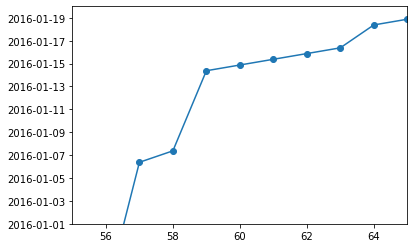

In [49]:
plt.scatter(np.arange(len(era_profile.index)), era_profile.index)
plt.plot(gfs_profile.index)
plt.xlim([55, 65])
plt.ylim([datetime(2016, 1, 1), datetime(2016, 1, 20)])

In [24]:
unique_keys = np.unique([k.split('_')[0] for k in overlap_keys if 'agl' in k])

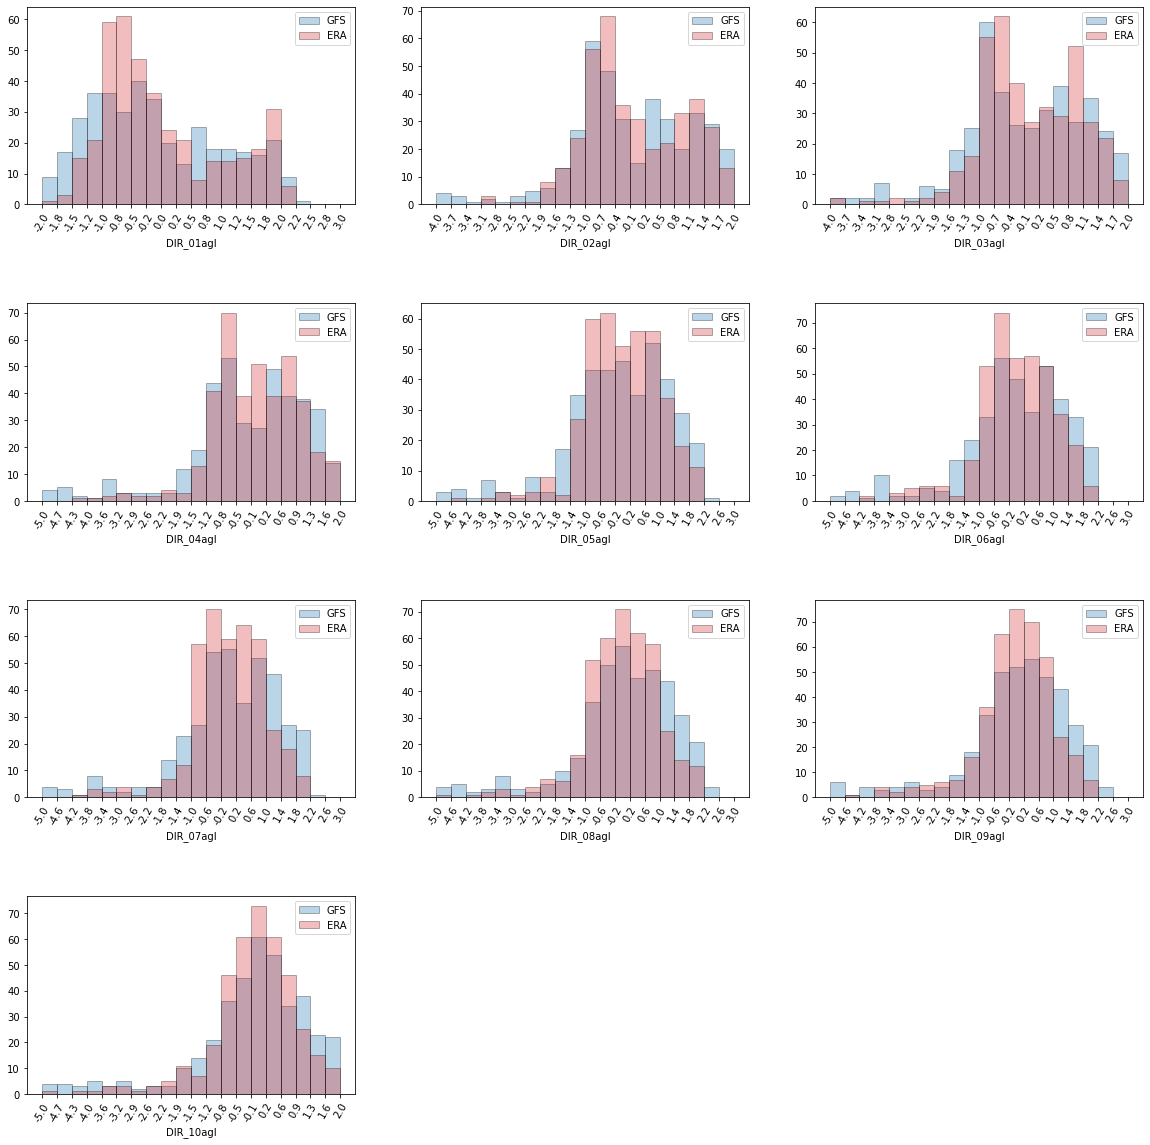

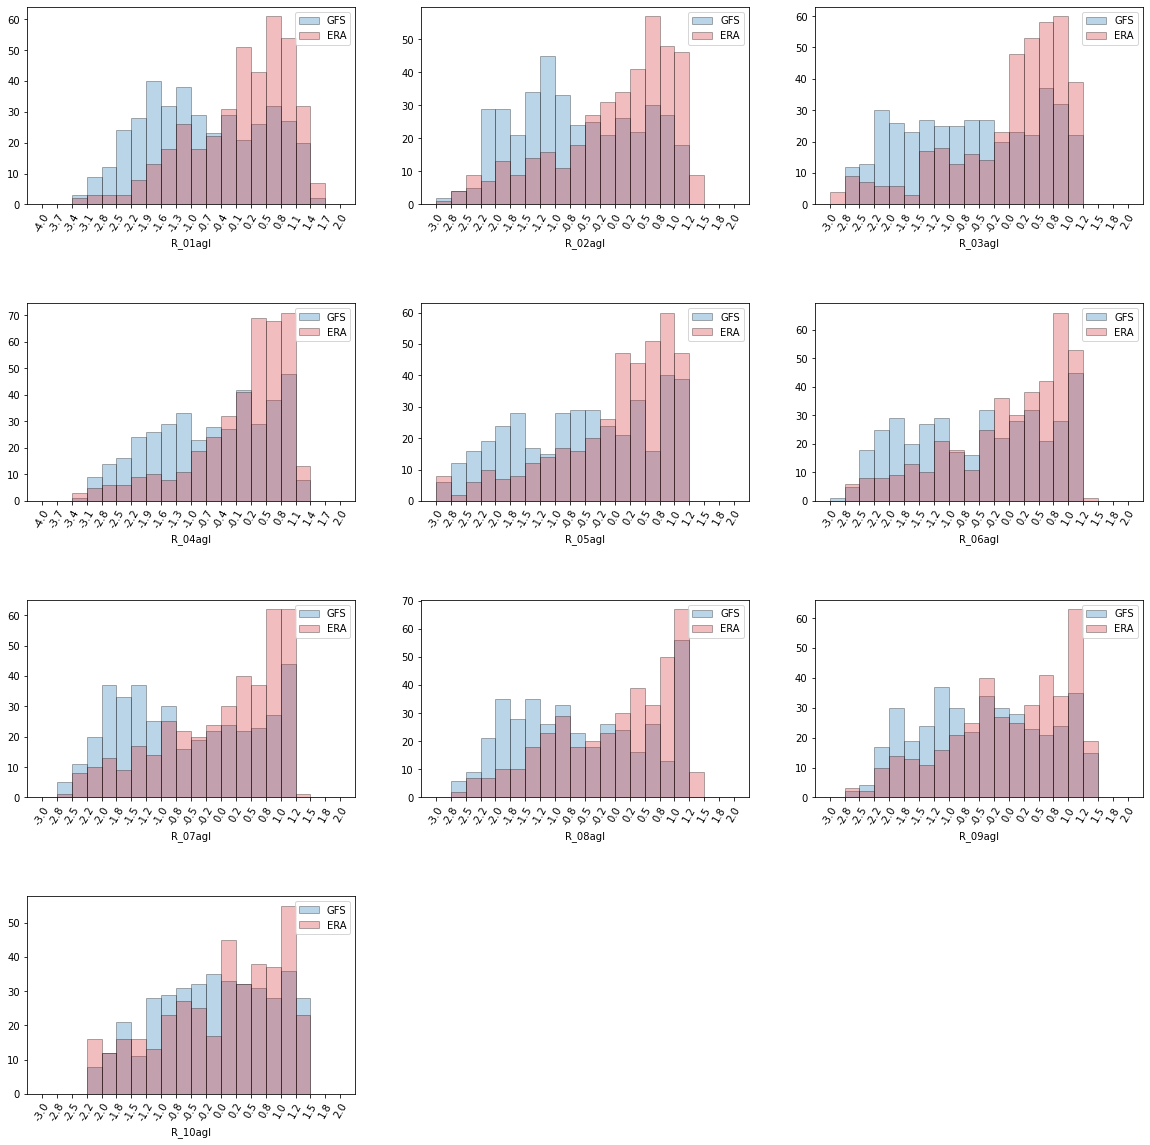

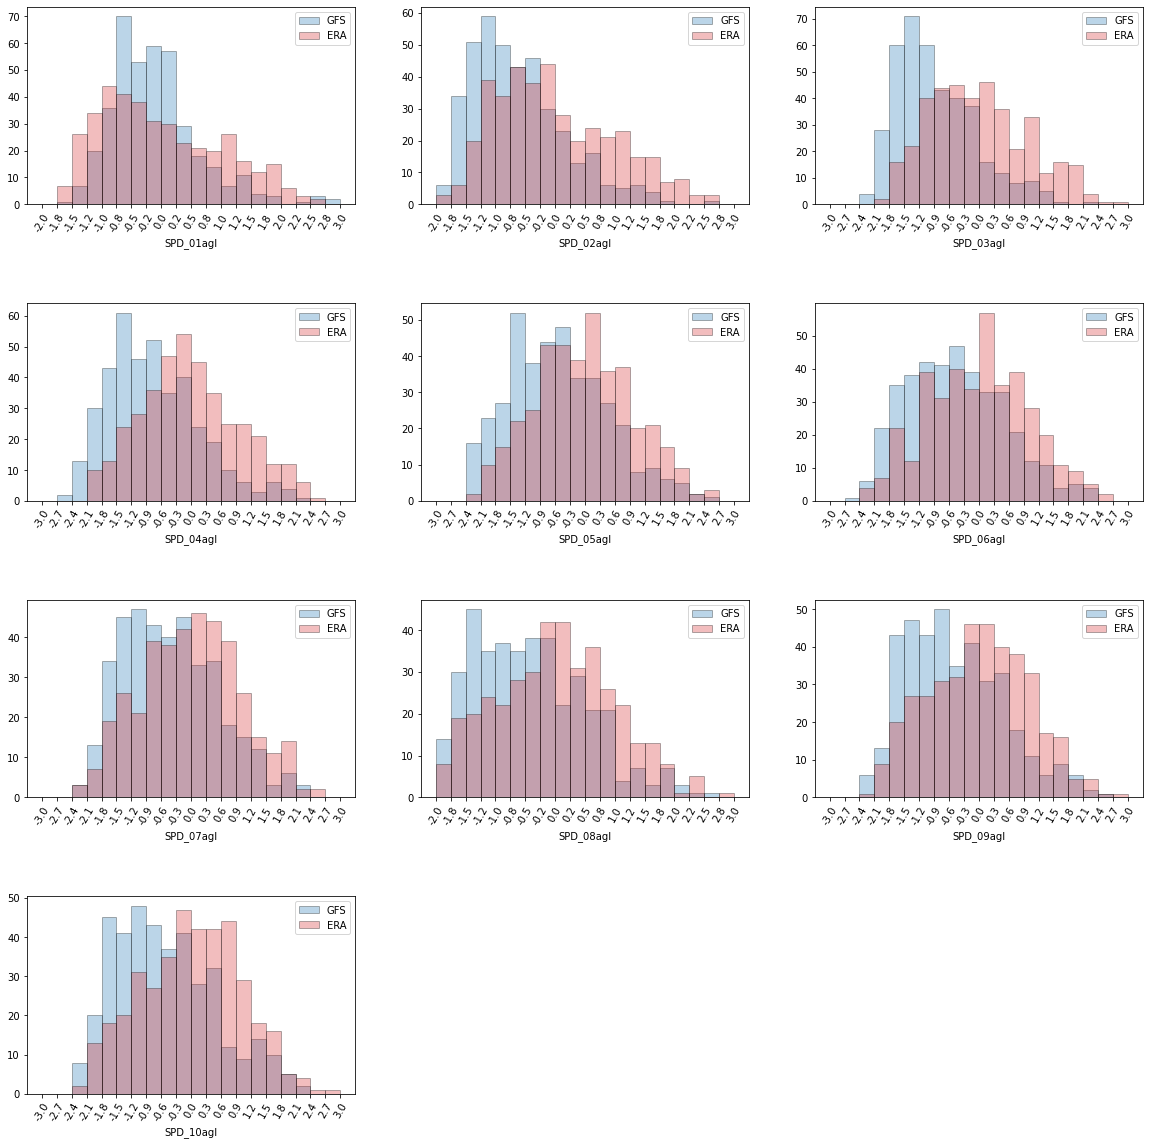

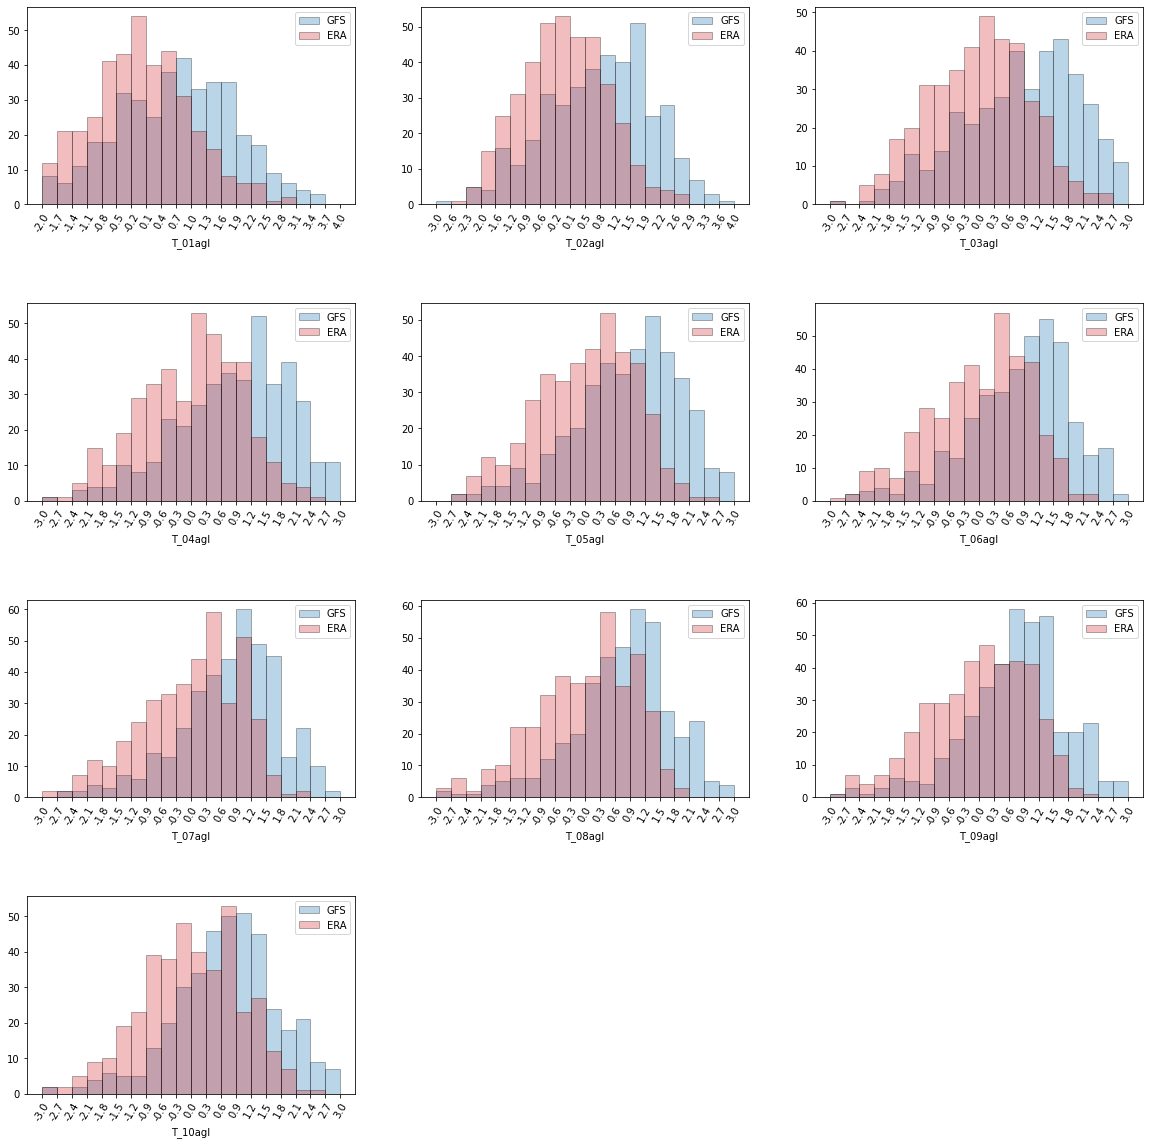

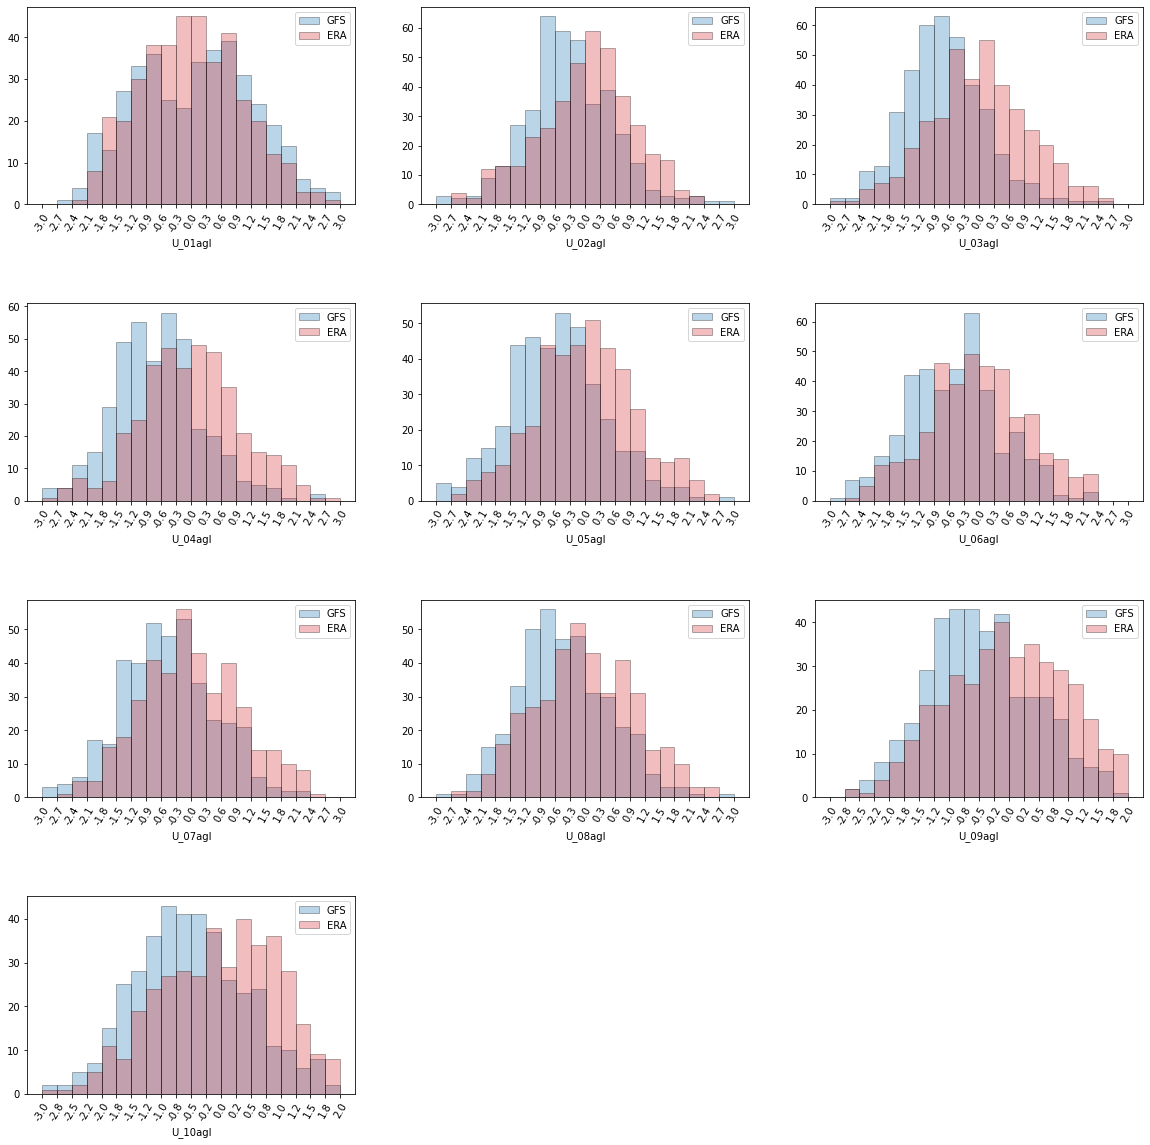

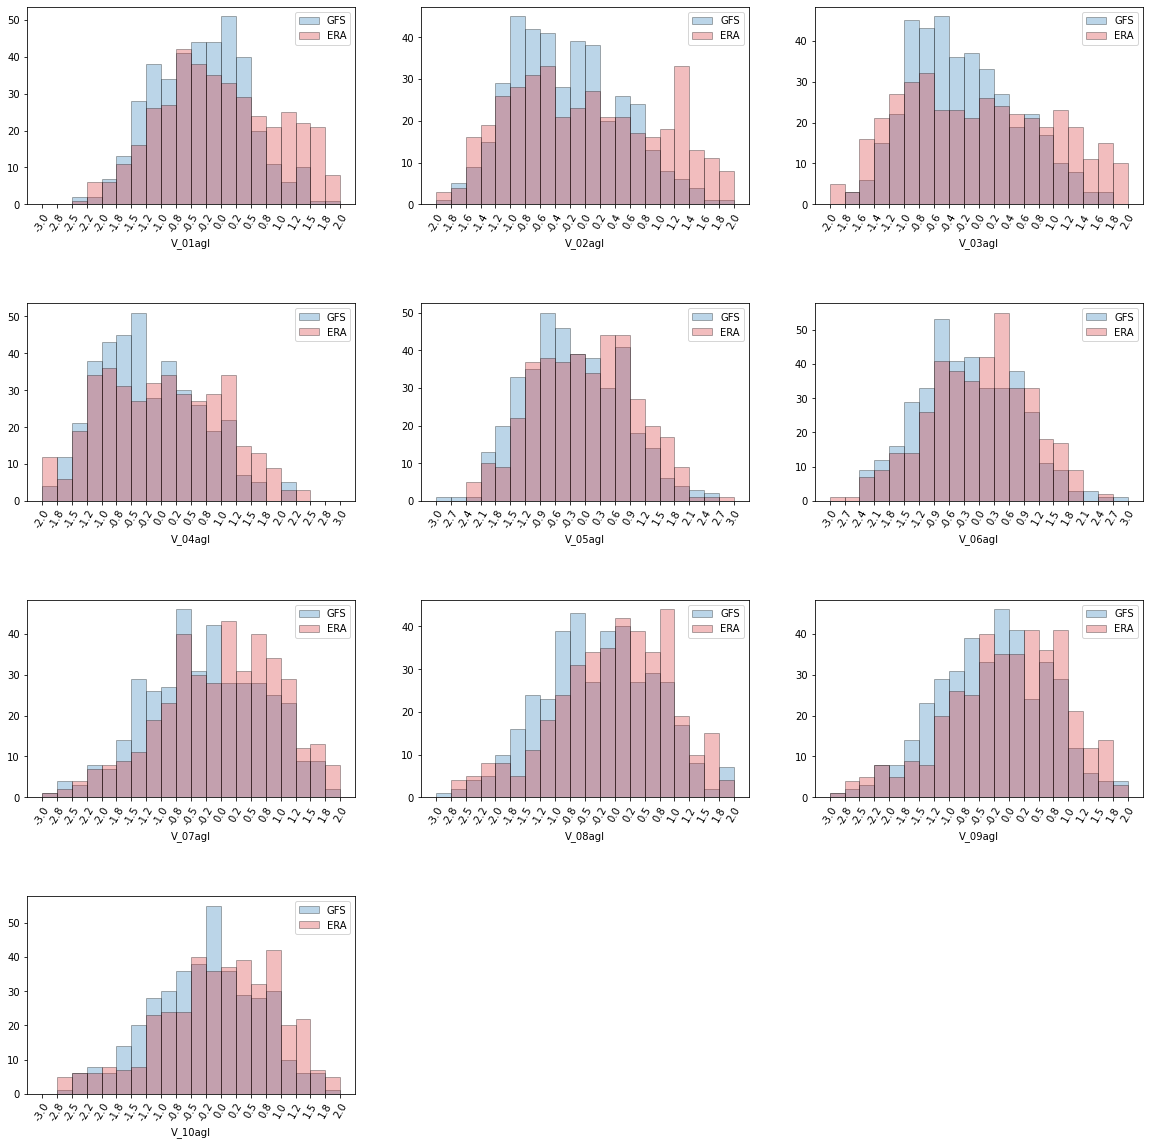

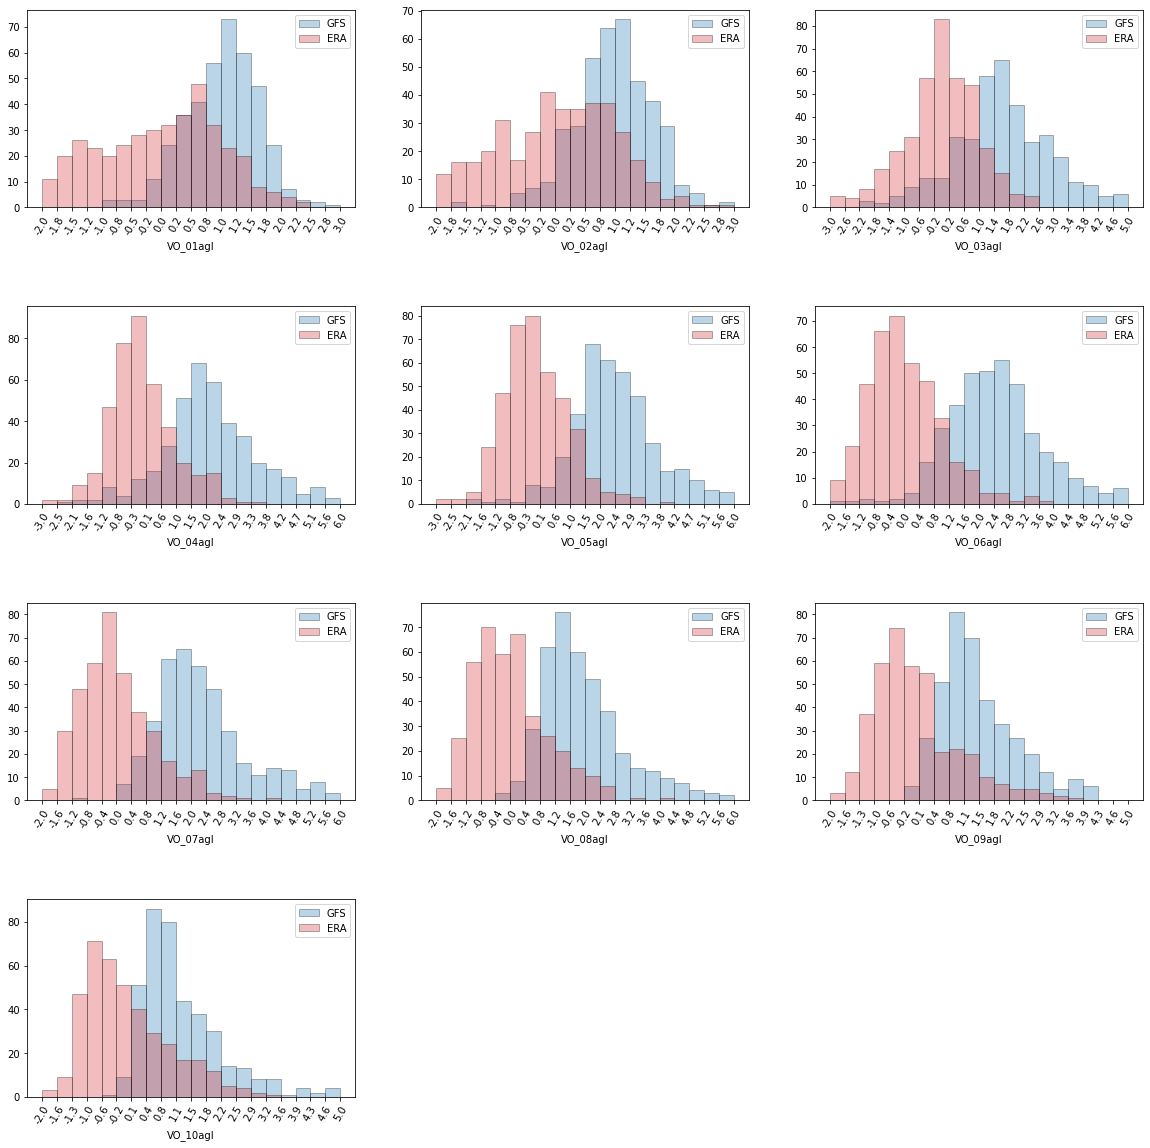

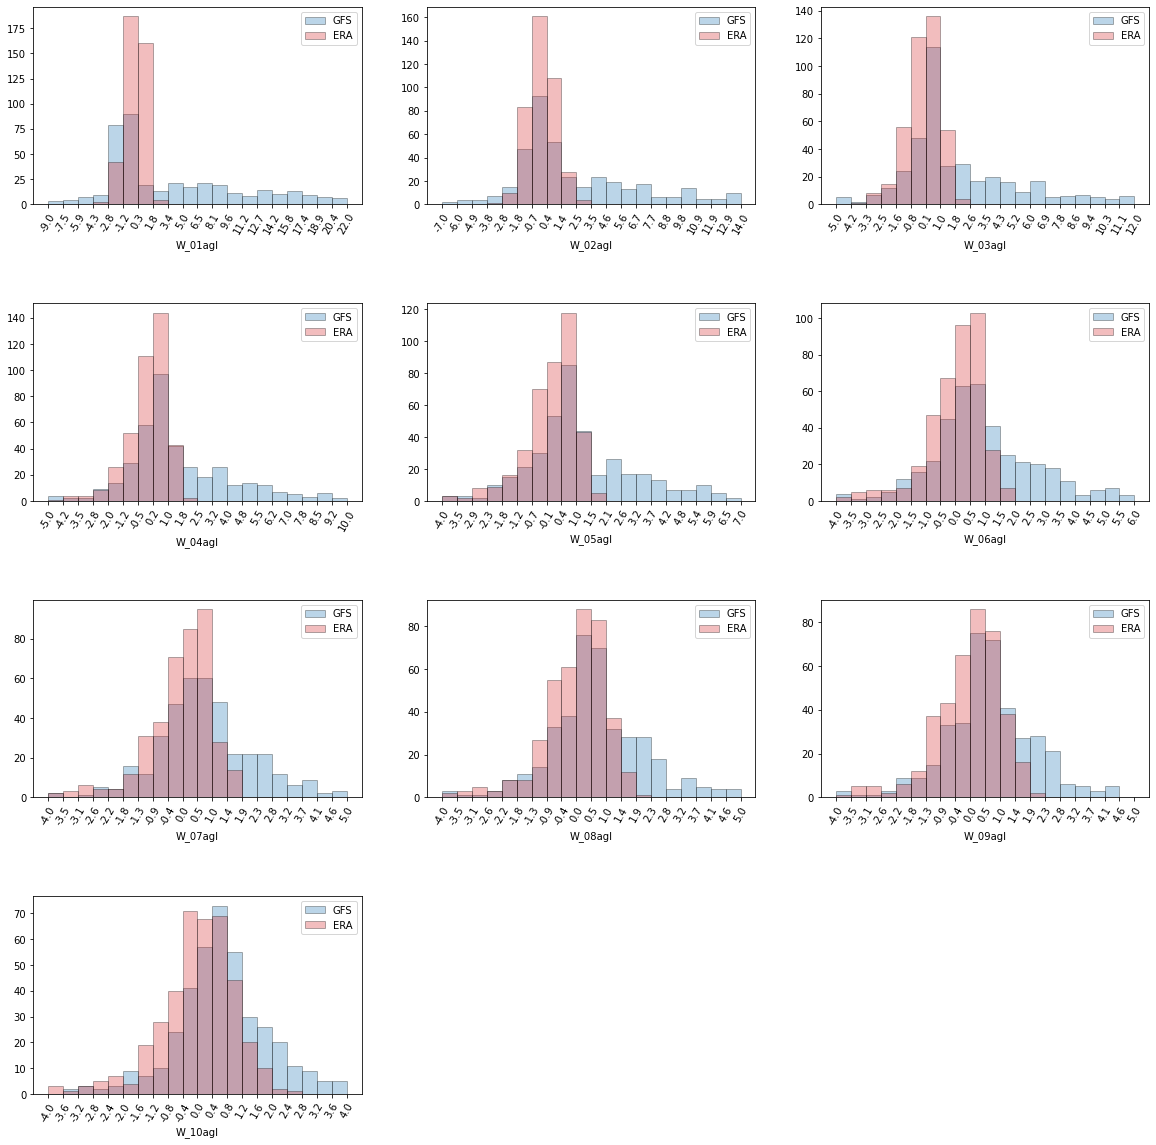

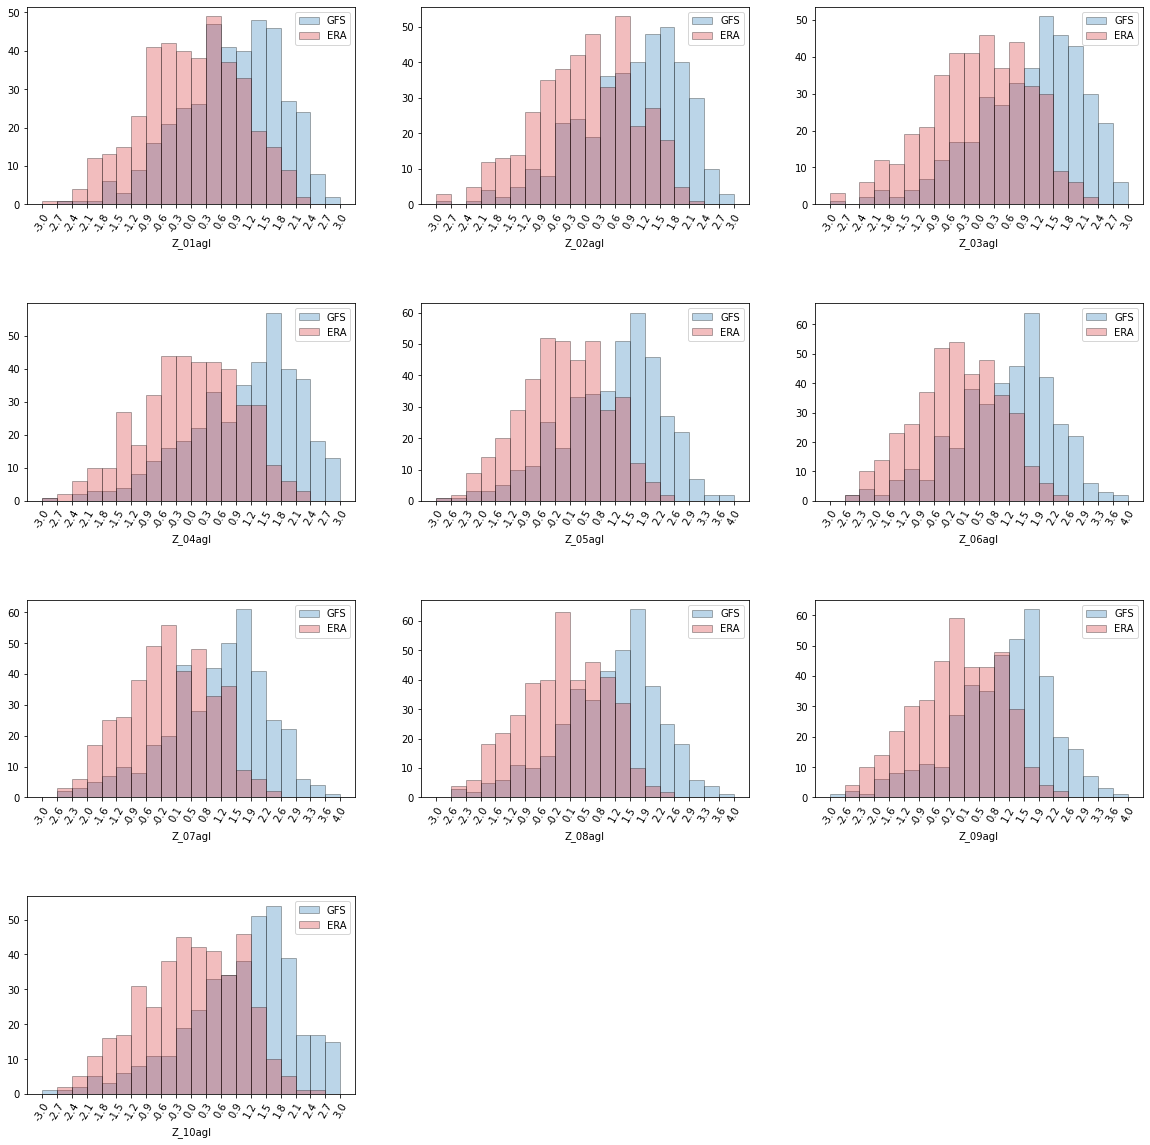

In [27]:
normed = True

for uk in unique_keys:
    level_keys = [k for k in overlap_keys if k.split('_')[0] == uk]
    
    fig, axs = plt.subplots(4, 3, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5)
    axs = axs.flatten()
    
    for ax, level_key in zip(axs[:-2], level_keys):
        
        if normed:
            gfs_vals = gfs_profile_norm[level_key].values
            era_vals = era_profile_norm[level_key].values
        
        else:
            gfs_vals = gfs_profile[level_key].values
            era_vals = era_profile[level_key].values
        
        minval, maxval = np.percentile(np.append(gfs_vals, era_vals), [1, 99])
        bins = np.linspace(np.floor(minval), np.ceil(maxval), 21)
        
        hist_args = dict(
            bins=bins,
            edgecolor='k',
            alpha=0.3,)
        
        ax.hist(gfs_vals, color='C0', label='GFS', **hist_args)
        ax.hist(era_vals, color='C3', label='ERA', **hist_args)

        ax.set_xticks(bins)
        ax.set_xticklabels(['%.1f'%b for b in bins], rotation=60)
        ax.set_xlabel(level_key)
        
        ax.legend(loc='upper right')
        
    axs[-1].axis('off')
    axs[-2].axis('off')

    plt.show()